# **결론 : 앞 타자의 출루율은 강한 장타력을 가진 뒷 타자에 긍정적인 영향을 미친다**

- 가설 1: 1,2번 타자의 출루율은 강한 장타력을 가진 뒷 타자에 긍정적인 영향을 미친다
- 필요한 데이터 : 앞선 타자의 출루율, 뒷 타자의 장타력

# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib import rc
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from matplotlib.colors import to_rgba
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager, rc
from matplotlib import font_manager, rc, rcParams

In [ ]:
# Google Drive에 업로드한 폰트 파일을 Colab으로 복사
!cp /content/NanumGothic.ttf

# 파일이 제대로 복사되었는지 확인
!ls -l /content/NanumGothic.ttf

cp: missing destination file operand after '/content/NanumGothic.ttf'
Try 'cp --help' for more information.
-rw-r--r-- 1 root root 4691820 Jun 24 00:35 /content/NanumGothic.ttf


In [ ]:
# 폰트 경로 설정 및 폰트 등록
font_path = '/content/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# matplotlib 설정 확인
print(rcParams['font.family'])

['NanumGothic']


In [2]:
# 1. 폰트 업로드
from google.colab import files
uploaded = files.upload()

Saving KBO Dia Gothic_medium.ttf to KBO Dia Gothic_medium.ttf


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


['KBO Dia Gothic']


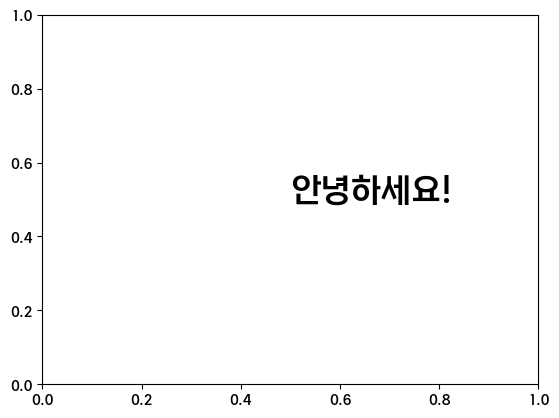

In [10]:
# 업로드된 파일명 확인 후 경로 설정
font_path = '/content/KBO Dia Gothic_medium.ttf'
font_manager.fontManager.addfont(font_path)
# 한글 폰트 설정
font_prop = FontProperties(fname=font_path)
rc('font', family='KBO Dia Gothic')

# matplotlib 설정 확인
print(rcParams['font.family'])
# 예제 텍스트 출력
plt.text(0.5, 0.5, '안녕하세요!', fontproperties=font_prop, fontsize=24)
plt.show()

In [5]:
font_path = '/content/KBO Dia Gothic_medium.ttf'

# 한글 폰트 설정
font_prop = FontProperties(fname=font_path)

# 폰트 프로퍼티 설정
font_prop = FontProperties(fname=font_path)

# KBO 10개구단 출루율-장타율 관계

## 2019

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Techit Data Analysis /13. Datathon/data/@KBO_10개구단/KBO_batting_order_2019.csv")

# 1루타 계산
df['1루타'] = df['안타'] - (df['2루타'] + df['3루타'] + df['홈런'])

# 출루율 (OBP) 계산
df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'])

# 장타율 (SLG) 계산
df['장타율'] = (df['1루타'] + 2*df['2루타'] + 3*df['3루타'] + 4*df['홈런']) / df['타수']

# 타수가 너무 적은 경우를 제외하기 위해 타수 기준 설정
min_at_bats = 10  # 예를 들어, 100 타수 미만인 경우 제외

# 타수가 기준 미만인 데이터를 제외
# df = df[df['타수'] >= min_at_bats]

# 타순별로 데이터 분리
table = df[df['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = df[df['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = df[df['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 결측값 제거
table = table.dropna(subset=['출루율', '장타율'])
center = center.dropna(subset=['출루율', '장타율'])
bottom = bottom.dropna(subset=['출루율', '장타율'])

# 최상위/최하위 데이터를 동일한 길이로 선택
n = min(len(table), len(center))
m = min(len(center), len(bottom))
l = min(len(table), len(bottom))

table_1 = table.nlargest(n, '출루율').head(n)
center_1 = center.nlargest(n, '장타율').head(n)
center_2 = center.nlargest(m, '출루율').head(m)
bottom_2 = bottom.nlargest(m, '장타율').head(m)
bottom_3 = bottom.nlargest(l, '출루율').head(l)
table_3 = table.nlargest(l, '장타율').head(l)

table_4 = table.nsmallest(n, '출루율').head(n)
center_4 = center.nlargest(n, '장타율').head(n)
center_5 = center.nsmallest(m, '출루율').head(m)
bottom_5 = bottom.nlargest(m, '장타율').head(m)
bottom_6 = bottom.nsmallest(l, '출루율').head(l)
table_6 = table.nlargest(l, '장타율').head(l)

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['출루율'], center_1['장타율']) # 1-2번의 출루율, 3-5번의 장타율
correlation_2, p_value_2 = pearsonr(table_4['출루율'], center_4['장타율']) # 1-2번의 낮은 출루율, 3-5번의 장타율
correlation_3, p_value_3 = pearsonr(center_2['출루율'], bottom_2['장타율']) # 3-5번의 출루율 6-9번의 장타율
correlation_4, p_value_4 = pearsonr(center_5['출루율'], bottom_5['장타율']) # 3-5번의 낮은 출루율 6-9번의 장타율
correlation_5, p_value_5 = pearsonr(bottom_3['출루율'], table_3['장타율']) # 6-9번의 출루율 1-2번의 장타율
correlation_6, p_value_6 = pearsonr(bottom_6['출루율'], table_6['장타율']) # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과 출력 (소수점 4자리)
print(f'상위타선의 출루율 - 중심타선의 장타율: {correlation_1:.4f}, p-value: {p_value_1:.4f}') # 1-2번의 출루율, 3-5번의 장타율
print(f'상위타선의 낮은 출루율 - 중심타선의 장타율: {correlation_2:.4f}, p-value: {p_value_2:.4f}') # 1-2번의 낮은 출루율, 3-5번의 장타율
print(f'중심타선의 출루율 - 하위타선의 장타율: {correlation_3:.4f}, p-value: {p_value_3:.4f}') # 3-5번의 출루율 6-9번의 장타율
print(f'중심타선의 낮은 출루율 - 하위타선의 장타율: {correlation_4:.4f}, p-value: {p_value_4:.4f}') # 3-5번의 낮은 출루율 6-9번의 장타율
print(f'하위타선의 출루율 - 상위타선의 장타율: {correlation_5:.4f}, p-value: {p_value_5:.4f}') # 6-9번의 출루율 1-2번의 장타율
print(f'하위타선의 낮은 출루율 - 상위타선의 장타율: {correlation_6:.4f}, p-value: {p_value_6:.4f}') # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과를 테이블로 저장
result_df = pd.DataFrame({
    '연도': ['2019'],
    '상위→중심': [correlation_1],
    '중심→하위': [correlation_3],
    '하위→상위' : [correlation_5],
    '낮은상위→중심': [correlation_2],
    '낮은중심→하위': [correlation_4],
    '낮은하위→상위' : [correlation_6]
})

result_df

상위타선의 출루율 - 중심타선의 장타율: 0.8481, p-value: 0.0000
상위타선의 낮은 출루율 - 중심타선의 장타율: -0.6047, p-value: 0.0000
중심타선의 출루율 - 하위타선의 장타율: 0.8321, p-value: 0.0000
중심타선의 낮은 출루율 - 하위타선의 장타율: -0.6025, p-value: 0.0000
하위타선의 출루율 - 상위타선의 장타율: 0.9080, p-value: 0.0000
하위타선의 낮은 출루율 - 상위타선의 장타율: -0.7089, p-value: 0.0000


,연도,상위→중심,중심→하위,하위→상위,낮은상위→중심,낮은중심→하위,낮은하위→상위
0,2019,0.848145,0.832075,0.908,-0.604704,-0.602454,-0.708898


## 2020

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Techit Data Analysis /13. Datathon/data/@KBO_10개구단/KBO_batting_order_2020.csv")

# 1루타 계산
df['1루타'] = df['안타'] - (df['2루타'] + df['3루타'] + df['홈런'])

# 출루율 (OBP) 계산
df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'])

# 장타율 (SLG) 계산
df['장타율'] = (df['1루타'] + 2*df['2루타'] + 3*df['3루타'] + 4*df['홈런']) / df['타수']

# 타수가 너무 적은 경우를 제외하기 위해 타수 기준 설정
min_at_bats = 10  # 예를 들어, 100 타수 미만인 경우 제외

# 타수가 기준 미만인 데이터를 제외
# df = df[df['타수'] >= min_at_bats]

# 타순별로 데이터 분리
table = df[df['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = df[df['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = df[df['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 결측값 제거
table = table.dropna(subset=['출루율', '장타율'])
center = center.dropna(subset=['출루율', '장타율'])
bottom = bottom.dropna(subset=['출루율', '장타율'])

# 최상위/최하위 데이터를 동일한 길이로 선택
n = min(len(table), len(center))
m = min(len(center), len(bottom))
l = min(len(table), len(bottom))

table_1 = table.nlargest(n, '출루율').head(n)
center_1 = center.nlargest(n, '장타율').head(n)
center_2 = center.nlargest(m, '출루율').head(m)
bottom_2 = bottom.nlargest(m, '장타율').head(m)
bottom_3 = bottom.nlargest(l, '출루율').head(l)
table_3 = table.nlargest(l, '장타율').head(l)

table_4 = table.nsmallest(n, '출루율').head(n)
center_4 = center.nlargest(n, '장타율').head(n)
center_5 = center.nsmallest(m, '출루율').head(m)
bottom_5 = bottom.nlargest(m, '장타율').head(m)
bottom_6 = bottom.nsmallest(l, '출루율').head(l)
table_6 = table.nlargest(l, '장타율').head(l)

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['출루율'], center_1['장타율']) # 1-2번의 출루율, 3-5번의 장타율
correlation_2, p_value_2 = pearsonr(table_4['출루율'], center_4['장타율']) # 1-2번의 낮은 출루율, 3-5번의 장타율
correlation_3, p_value_3 = pearsonr(center_2['출루율'], bottom_2['장타율']) # 3-5번의 출루율 6-9번의 장타율
correlation_4, p_value_4 = pearsonr(center_5['출루율'], bottom_5['장타율']) # 3-5번의 낮은 출루율 6-9번의 장타율
correlation_5, p_value_5 = pearsonr(bottom_3['출루율'], table_3['장타율']) # 6-9번의 출루율 1-2번의 장타율
correlation_6, p_value_6 = pearsonr(bottom_6['출루율'], table_6['장타율']) # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과 출력 (소수점 4자리)
print(f'상위타선의 출루율 - 중심타선의 장타율: {correlation_1:.4f}, p-value: {p_value_1:.4f}') # 1-2번의 출루율, 3-5번의 장타율
print(f'상위타선의 낮은 출루율 - 중심타선의 장타율: {correlation_2:.4f}, p-value: {p_value_2:.4f}') # 1-2번의 낮은 출루율, 3-5번의 장타율
print(f'중심타선의 출루율 - 하위타선의 장타율: {correlation_3:.4f}, p-value: {p_value_3:.4f}') # 3-5번의 출루율 6-9번의 장타율
print(f'중심타선의 낮은 출루율 - 하위타선의 장타율: {correlation_4:.4f}, p-value: {p_value_4:.4f}') # 3-5번의 낮은 출루율 6-9번의 장타율
print(f'하위타선의 출루율 - 상위타선의 장타율: {correlation_5:.4f}, p-value: {p_value_5:.4f}') # 6-9번의 출루율 1-2번의 장타율
print(f'하위타선의 낮은 출루율 - 상위타선의 장타율: {correlation_6:.4f}, p-value: {p_value_6:.4f}') # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과를 테이블로 저장
new_df = pd.DataFrame({
    '연도': ['2020'],
    '상위→중심': [correlation_1],
    '중심→하위': [correlation_3],
    '하위→상위' : [correlation_5],
    '낮은상위→중심': [correlation_2],
    '낮은중심→하위': [correlation_4],
    '낮은하위→상위' : [correlation_6]
})

# 새로운 데이터프레임을 기존의 result_df에 추가
result_df = pd.concat([result_df, new_df])
result_df

상위타선의 출루율 - 중심타선의 장타율: 0.7779, p-value: 0.0000
상위타선의 낮은 출루율 - 중심타선의 장타율: -0.5820, p-value: 0.0000
중심타선의 출루율 - 하위타선의 장타율: 0.7838, p-value: 0.0000
중심타선의 낮은 출루율 - 하위타선의 장타율: -0.5414, p-value: 0.0000
하위타선의 출루율 - 상위타선의 장타율: 0.8611, p-value: 0.0000
하위타선의 낮은 출루율 - 상위타선의 장타율: -0.6889, p-value: 0.0000


,연도,상위→중심,중심→하위,하위→상위,낮은상위→중심,낮은중심→하위,낮은하위→상위
0,2019,0.848145,0.832075,0.908000,-0.604704,-0.602454,-0.708898
0,2020,0.777890,0.783789,0.861072,-0.581985,-0.541412,-0.688901


## 2021

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Techit Data Analysis /13. Datathon/data/@KBO_10개구단/KBO_batting_order_2021.csv")

# 1루타 계산
df['1루타'] = df['안타'] - (df['2루타'] + df['3루타'] + df['홈런'])

# 출루율 (OBP) 계산
df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'])

# 장타율 (SLG) 계산
df['장타율'] = (df['1루타'] + 2*df['2루타'] + 3*df['3루타'] + 4*df['홈런']) / df['타수']

# 타수가 너무 적은 경우를 제외하기 위해 타수 기준 설정
min_at_bats = 10  # 예를 들어, 100 타수 미만인 경우 제외

# 타수가 기준 미만인 데이터를 제외
# df = df[df['타수'] >= min_at_bats]

# 타순별로 데이터 분리
table = df[df['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = df[df['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = df[df['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 결측값 제거
table = table.dropna(subset=['출루율', '장타율'])
center = center.dropna(subset=['출루율', '장타율'])
bottom = bottom.dropna(subset=['출루율', '장타율'])

# 최상위/최하위 데이터를 동일한 길이로 선택
n = min(len(table), len(center))
m = min(len(center), len(bottom))
l = min(len(table), len(bottom))

table_1 = table.nlargest(n, '출루율').head(n)
center_1 = center.nlargest(n, '장타율').head(n)
center_2 = center.nlargest(m, '출루율').head(m)
bottom_2 = bottom.nlargest(m, '장타율').head(m)
bottom_3 = bottom.nlargest(l, '출루율').head(l)
table_3 = table.nlargest(l, '장타율').head(l)

table_4 = table.nsmallest(n, '출루율').head(n)
center_4 = center.nlargest(n, '장타율').head(n)
center_5 = center.nsmallest(m, '출루율').head(m)
bottom_5 = bottom.nlargest(m, '장타율').head(m)
bottom_6 = bottom.nsmallest(l, '출루율').head(l)
table_6 = table.nlargest(l, '장타율').head(l)

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['출루율'], center_1['장타율']) # 1-2번의 출루율, 3-5번의 장타율
correlation_2, p_value_2 = pearsonr(table_4['출루율'], center_4['장타율']) # 1-2번의 낮은 출루율, 3-5번의 장타율
correlation_3, p_value_3 = pearsonr(center_2['출루율'], bottom_2['장타율']) # 3-5번의 출루율 6-9번의 장타율
correlation_4, p_value_4 = pearsonr(center_5['출루율'], bottom_5['장타율']) # 3-5번의 낮은 출루율 6-9번의 장타율
correlation_5, p_value_5 = pearsonr(bottom_3['출루율'], table_3['장타율']) # 6-9번의 출루율 1-2번의 장타율
correlation_6, p_value_6 = pearsonr(bottom_6['출루율'], table_6['장타율']) # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과 출력 (소수점 4자리)
print(f'상위타선의 출루율 - 중심타선의 장타율: {correlation_1:.4f}, p-value: {p_value_1:.4f}') # 1-2번의 출루율, 3-5번의 장타율
print(f'상위타선의 낮은 출루율 - 중심타선의 장타율: {correlation_2:.4f}, p-value: {p_value_2:.4f}') # 1-2번의 낮은 출루율, 3-5번의 장타율
print(f'중심타선의 출루율 - 하위타선의 장타율: {correlation_3:.4f}, p-value: {p_value_3:.4f}') # 3-5번의 출루율 6-9번의 장타율
print(f'중심타선의 낮은 출루율 - 하위타선의 장타율: {correlation_4:.4f}, p-value: {p_value_4:.4f}') # 3-5번의 낮은 출루율 6-9번의 장타율
print(f'하위타선의 출루율 - 상위타선의 장타율: {correlation_5:.4f}, p-value: {p_value_5:.4f}') # 6-9번의 출루율 1-2번의 장타율
print(f'하위타선의 낮은 출루율 - 상위타선의 장타율: {correlation_6:.4f}, p-value: {p_value_6:.4f}') # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과를 테이블로 저장
new_df = pd.DataFrame({
    '연도': ['2021'],
    '상위→중심': [correlation_1],
    '중심→하위': [correlation_3],
    '하위→상위' : [correlation_5],
    '낮은상위→중심': [correlation_2],
    '낮은중심→하위': [correlation_4],
    '낮은하위→상위' : [correlation_6]
})

# 새로운 데이터프레임을 result_df에 추가
result_df = pd.concat([result_df, new_df])
result_df

상위타선의 출루율 - 중심타선의 장타율: 0.8507, p-value: 0.0000
상위타선의 낮은 출루율 - 중심타선의 장타율: -0.6767, p-value: 0.0000
중심타선의 출루율 - 하위타선의 장타율: 0.8536, p-value: 0.0000
중심타선의 낮은 출루율 - 하위타선의 장타율: -0.6130, p-value: 0.0000
하위타선의 출루율 - 상위타선의 장타율: 0.8924, p-value: 0.0000
하위타선의 낮은 출루율 - 상위타선의 장타율: -0.7193, p-value: 0.0000


,연도,상위→중심,중심→하위,하위→상위,낮은상위→중심,낮은중심→하위,낮은하위→상위
0,2019,0.848145,0.832075,0.908000,-0.604704,-0.602454,-0.708898
0,2020,0.777890,0.783789,0.861072,-0.581985,-0.541412,-0.688901
0,2021,0.850744,0.853623,0.892436,-0.676663,-0.613042,-0.719262


## 2022

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Techit Data Analysis /13. Datathon/data/@KBO_10개구단/KBO_batting_order_2022.csv")

# 1루타 계산
df['1루타'] = df['안타'] - (df['2루타'] + df['3루타'] + df['홈런'])

# 출루율 (OBP) 계산
df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'])

# 장타율 (SLG) 계산
df['장타율'] = (df['1루타'] + 2*df['2루타'] + 3*df['3루타'] + 4*df['홈런']) / df['타수']

# 타수가 너무 적은 경우를 제외하기 위해 타수 기준 설정
min_at_bats = 10  # 예를 들어, 100 타수 미만인 경우 제외

# 타수가 기준 미만인 데이터를 제외
# df = df[df['타수'] >= min_at_bats]

# 타순별로 데이터 분리
table = df[df['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = df[df['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = df[df['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 결측값 제거
table = table.dropna(subset=['출루율', '장타율'])
center = center.dropna(subset=['출루율', '장타율'])
bottom = bottom.dropna(subset=['출루율', '장타율'])

# 최상위/최하위 데이터를 동일한 길이로 선택
n = min(len(table), len(center))
m = min(len(center), len(bottom))
l = min(len(table), len(bottom))

table_1 = table.nlargest(n, '출루율').head(n)
center_1 = center.nlargest(n, '장타율').head(n)
center_2 = center.nlargest(m, '출루율').head(m)
bottom_2 = bottom.nlargest(m, '장타율').head(m)
bottom_3 = bottom.nlargest(l, '출루율').head(l)
table_3 = table.nlargest(l, '장타율').head(l)

table_4 = table.nsmallest(n, '출루율').head(n)
center_4 = center.nlargest(n, '장타율').head(n)
center_5 = center.nsmallest(m, '출루율').head(m)
bottom_5 = bottom.nlargest(m, '장타율').head(m)
bottom_6 = bottom.nsmallest(l, '출루율').head(l)
table_6 = table.nlargest(l, '장타율').head(l)

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['출루율'], center_1['장타율']) # 1-2번의 출루율, 3-5번의 장타율
correlation_2, p_value_2 = pearsonr(table_4['출루율'], center_4['장타율']) # 1-2번의 낮은 출루율, 3-5번의 장타율
correlation_3, p_value_3 = pearsonr(center_2['출루율'], bottom_2['장타율']) # 3-5번의 출루율 6-9번의 장타율
correlation_4, p_value_4 = pearsonr(center_5['출루율'], bottom_5['장타율']) # 3-5번의 낮은 출루율 6-9번의 장타율
correlation_5, p_value_5 = pearsonr(bottom_3['출루율'], table_3['장타율']) # 6-9번의 출루율 1-2번의 장타율
correlation_6, p_value_6 = pearsonr(bottom_6['출루율'], table_6['장타율']) # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과 출력 (소수점 4자리)
print(f'상위타선의 출루율 - 중심타선의 장타율: {correlation_1:.4f}, p-value: {p_value_1:.4f}') # 1-2번의 출루율, 3-5번의 장타율
print(f'상위타선의 낮은 출루율 - 중심타선의 장타율: {correlation_2:.4f}, p-value: {p_value_2:.4f}') # 1-2번의 낮은 출루율, 3-5번의 장타율
print(f'중심타선의 출루율 - 하위타선의 장타율: {correlation_3:.4f}, p-value: {p_value_3:.4f}') # 3-5번의 출루율 6-9번의 장타율
print(f'중심타선의 낮은 출루율 - 하위타선의 장타율: {correlation_4:.4f}, p-value: {p_value_4:.4f}') # 3-5번의 낮은 출루율 6-9번의 장타율
print(f'하위타선의 출루율 - 상위타선의 장타율: {correlation_5:.4f}, p-value: {p_value_5:.4f}') # 6-9번의 출루율 1-2번의 장타율
print(f'하위타선의 낮은 출루율 - 상위타선의 장타율: {correlation_6:.4f}, p-value: {p_value_6:.4f}') # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과를 테이블로 저장
new_df = pd.DataFrame({
    '연도': ['2022'],
    '상위→중심': [correlation_1],
    '중심→하위': [correlation_3],
    '하위→상위' : [correlation_5],
    '낮은상위→중심': [correlation_2],
    '낮은중심→하위': [correlation_4],
    '낮은하위→상위' : [correlation_6]
})

# 새로운 데이터프레임을 result_df에 추가
result_df = pd.concat([result_df, new_df])
result_df

상위타선의 출루율 - 중심타선의 장타율: 0.8593, p-value: 0.0000
상위타선의 낮은 출루율 - 중심타선의 장타율: -0.5970, p-value: 0.0000
중심타선의 출루율 - 하위타선의 장타율: 0.7747, p-value: 0.0000
중심타선의 낮은 출루율 - 하위타선의 장타율: -0.5378, p-value: 0.0000
하위타선의 출루율 - 상위타선의 장타율: 0.8482, p-value: 0.0000
하위타선의 낮은 출루율 - 상위타선의 장타율: -0.6487, p-value: 0.0000


,연도,상위→중심,중심→하위,하위→상위,낮은상위→중심,낮은중심→하위,낮은하위→상위
0,2019,0.848145,0.832075,0.908000,-0.604704,-0.602454,-0.708898
0,2020,0.777890,0.783789,0.861072,-0.581985,-0.541412,-0.688901
0,2021,0.850744,0.853623,0.892436,-0.676663,-0.613042,-0.719262
0,2022,0.859270,0.774710,0.848238,-0.597046,-0.537790,-0.648656


## 2023

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Techit Data Analysis /13. Datathon/data/@KBO_10개구단/KBO_batting_order_2023.csv")

# 1루타 계산
df['1루타'] = df['안타'] - (df['2루타'] + df['3루타'] + df['홈런'])

# 출루율 (OBP) 계산
df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'])

# 장타율 (SLG) 계산
df['장타율'] = (df['1루타'] + 2*df['2루타'] + 3*df['3루타'] + 4*df['홈런']) / df['타수']

# 타수가 너무 적은 경우를 제외하기 위해 타수 기준 설정
min_at_bats = 10  # 예를 들어, 100 타수 미만인 경우 제외

# 타수가 기준 미만인 데이터를 제외
# df = df[df['타수'] >= min_at_bats]

# 타순별로 데이터 분리
table = df[df['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = df[df['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = df[df['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 결측값 제거
table = table.dropna(subset=['출루율', '장타율'])
center = center.dropna(subset=['출루율', '장타율'])
bottom = bottom.dropna(subset=['출루율', '장타율'])

# 최상위/최하위 데이터를 동일한 길이로 선택
n = min(len(table), len(center))
m = min(len(center), len(bottom))
l = min(len(table), len(bottom))

table_1 = table.nlargest(n, '출루율').head(n)
center_1 = center.nlargest(n, '장타율').head(n)
center_2 = center.nlargest(m, '출루율').head(m)
bottom_2 = bottom.nlargest(m, '장타율').head(m)
bottom_3 = bottom.nlargest(l, '출루율').head(l)
table_3 = table.nlargest(l, '장타율').head(l)

table_4 = table.nsmallest(n, '출루율').head(n)
center_4 = center.nlargest(n, '장타율').head(n)
center_5 = center.nsmallest(m, '출루율').head(m)
bottom_5 = bottom.nlargest(m, '장타율').head(m)
bottom_6 = bottom.nsmallest(l, '출루율').head(l)
table_6 = table.nlargest(l, '장타율').head(l)

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['출루율'], center_1['장타율']) # 1-2번의 출루율, 3-5번의 장타율
correlation_2, p_value_2 = pearsonr(table_4['출루율'], center_4['장타율']) # 1-2번의 낮은 출루율, 3-5번의 장타율
correlation_3, p_value_3 = pearsonr(center_2['출루율'], bottom_2['장타율']) # 3-5번의 출루율 6-9번의 장타율
correlation_4, p_value_4 = pearsonr(center_5['출루율'], bottom_5['장타율']) # 3-5번의 낮은 출루율 6-9번의 장타율
correlation_5, p_value_5 = pearsonr(bottom_3['출루율'], table_3['장타율']) # 6-9번의 출루율 1-2번의 장타율
correlation_6, p_value_6 = pearsonr(bottom_6['출루율'], table_6['장타율']) # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과 출력 (소수점 4자리)
print(f'상위타선의 출루율 - 중심타선의 장타율: {correlation_1:.4f}, p-value: {p_value_1:.4f}') # 1-2번의 출루율, 3-5번의 장타율
print(f'상위타선의 낮은 출루율 - 중심타선의 장타율: {correlation_2:.4f}, p-value: {p_value_2:.4f}') # 1-2번의 낮은 출루율, 3-5번의 장타율
print(f'중심타선의 출루율 - 하위타선의 장타율: {correlation_3:.4f}, p-value: {p_value_3:.4f}') # 3-5번의 출루율 6-9번의 장타율
print(f'중심타선의 낮은 출루율 - 하위타선의 장타율: {correlation_4:.4f}, p-value: {p_value_4:.4f}') # 3-5번의 낮은 출루율 6-9번의 장타율
print(f'하위타선의 출루율 - 상위타선의 장타율: {correlation_5:.4f}, p-value: {p_value_5:.4f}') # 6-9번의 출루율 1-2번의 장타율
print(f'하위타선의 낮은 출루율 - 상위타선의 장타율: {correlation_6:.4f}, p-value: {p_value_6:.4f}') # 6-9번의 낮은 출루율 1-2번의 장타율

# 결과를 테이블로 저장
new_df = pd.DataFrame({
    '연도': ['2023'],
    '상위→중심': [correlation_1],
    '중심→하위': [correlation_3],
    '하위→상위' : [correlation_5],
    '낮은상위→중심': [correlation_2],
    '낮은중심→하위': [correlation_4],
    '낮은하위→상위' : [correlation_6]
})

# 새로운 데이터프레임을 result_df에 추가
result_df = pd.concat([result_df, new_df])
result_df

상위타선의 출루율 - 중심타선의 장타율: 0.9512, p-value: 0.0000
상위타선의 낮은 출루율 - 중심타선의 장타율: -0.7537, p-value: 0.0000
중심타선의 출루율 - 하위타선의 장타율: 0.8177, p-value: 0.0000
중심타선의 낮은 출루율 - 하위타선의 장타율: -0.5938, p-value: 0.0000
하위타선의 출루율 - 상위타선의 장타율: 0.9350, p-value: 0.0000
하위타선의 낮은 출루율 - 상위타선의 장타율: -0.7551, p-value: 0.0000


,연도,상위→중심,중심→하위,하위→상위,낮은상위→중심,낮은중심→하위,낮은하위→상위
0,2019,0.848145,0.832075,0.908000,-0.604704,-0.602454,-0.708898
0,2020,0.777890,0.783789,0.861072,-0.581985,-0.541412,-0.688901
0,2021,0.850744,0.853623,0.892436,-0.676663,-0.613042,-0.719262
0,2022,0.859270,0.774710,0.848238,-0.597046,-0.537790,-0.648656
0,2023,0.951171,0.817730,0.935004,-0.753681,-0.593848,-0.755081


# 2019~2023 평균

In [ ]:
# '연도' 열을 인덱스로 설정
result_df.set_index('연도', inplace=True)
# 음수 절대값으로 변환
result_df = result_df.applymap(lambda x: abs(x) if x < 0 else x)
# 각 열의 평균을 계산하여 맨 마지막 행에 추가
result_df.loc['평균'] = result_df.mean()

result_df

,상위→중심,중심→하위,하위→상위,낮은상위→중심,낮은중심→하위,낮은하위→상위
연도,,,,,,
2019,0.848145,0.832075,0.908000,0.604704,0.602454,0.708898
2020,0.777890,0.783789,0.861072,0.581985,0.541412,0.688901
2021,0.850744,0.853623,0.892436,0.676663,0.613042,0.719262
2022,0.859270,0.774710,0.848238,0.597046,0.537790,0.648656
2023,0.951171,0.817730,0.935004,0.753681,0.593848,0.755081
평균,0.857444,0.812386,0.888950,0.642816,0.577709,0.704159


In [ ]:
result_df.rename(columns={'낮은상위→중심': '상위→중심', '낮은중심→하위':'중심→하위', '낮은하위→상위':'하위→상위'}, inplace=True)
result_df

,상위→중심,중심→하위,하위→상위,상위→중심,중심→하위,하위→상위
연도,,,,,,
2019,0.848145,0.832075,0.908000,0.604704,0.602454,0.708898
2020,0.777890,0.783789,0.861072,0.581985,0.541412,0.688901
2021,0.850744,0.853623,0.892436,0.676663,0.613042,0.719262
2022,0.859270,0.774710,0.848238,0.597046,0.537790,0.648656
2023,0.951171,0.817730,0.935004,0.753681,0.593848,0.755081
평균,0.857444,0.812386,0.888950,0.642816,0.577709,0.704159


In [ ]:
result_df.to_excel('가설1_데이터.xlsx')

## 시각화

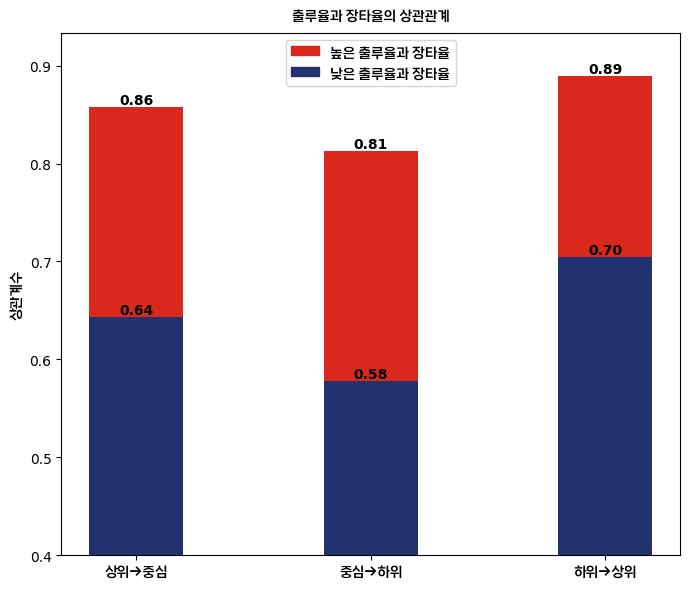

In [ ]:
# 시각화 준비: 평균 행만 추출
mean_values = result_df.loc['평균']

# 색상 코드
color1 = '#DA291C'  # M100 Y100 R237 G28 B36
color2 = '#22326e'  # C100 M80 K50 R0 B37 G97

# 막대 그래프 색상 설정
colors = [color1, color2]
labels = ['높은 출루율과 장타율', '낮은 출루율과 장타율']

# 막대 그래프로 시각화
plt.figure(figsize=(7, 6))
bar_width = 0.4  # 막대의 너비

# 각 막대 그래프 그리기
for i, (index, value) in enumerate(mean_values.items()):
    # 색상 선택
    color = colors[i // 3]  # 0~2는 첫 번째 색상, 3~5는 두 번째 색상
    # 막대 그래프 그리기
    plt.bar(index, value, width=bar_width, label=index, color=color, alpha=1)
    # 각 막대 위에 값 표시
    plt.text(index, value, f'{value:.2f}', va='bottom', ha='center', fontsize=10, fontweight='bold')

# legend에 색상 박스 추가
legend_patches = [
    mpatches.Patch(color=color1, label='높은 출루율과 장타율'),
    mpatches.Patch(color=color2, label='낮은 출루율과 장타율')
]
plt.legend(handles=legend_patches, loc='upper center', fontsize=10, prop=font_prop)
plt.gca().patch.set_alpha(0)
plt.title('출루율과 장타율의 상관관계', pad=10, fontproperties=font_prop)
plt.ylabel('상관계수', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)

plt.grid(axis='y', linestyle='--', alpha=0)
plt.ylim(0.4, None)  # 최소값을 0.4로 지정
plt.tight_layout()

plt.show()

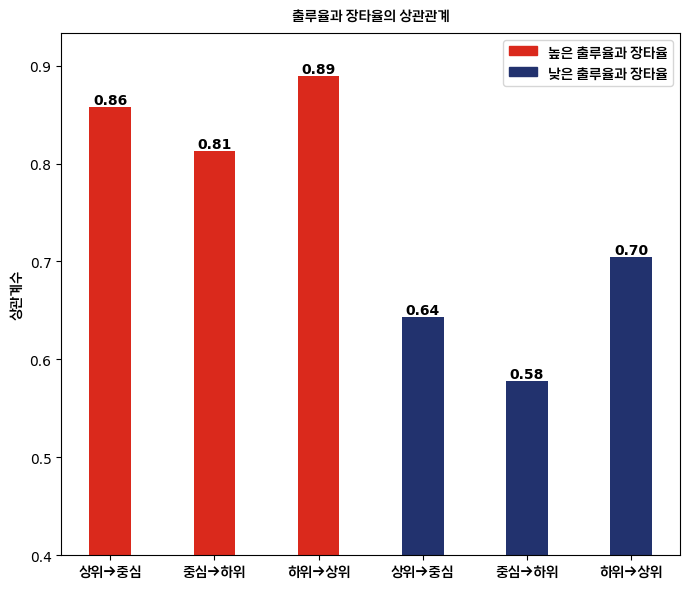

In [ ]:
# 시각화 준비: 평균 행만 추출
mean_values = result_df.loc['평균']

# 색상 코드
color1 = '#DA291C'  # M100 Y100 R237 G28 B36
color2 = '#22326e'  # C100 M80 K50 R0 B37 G97

# 막대 그래프 색상 설정
colors = [color1, color2]
labels = ['높은 출루율과 장타율', '낮은 출루율과 장타율']

# 막대 그래프로 시각화
plt.figure(figsize=(7, 6))
bar_width = 0.4  # 막대의 너비

# 각 막대 그래프 그리기
for i, (index, value) in enumerate(mean_values.items()):
    # 색상 선택
    color = colors[i // 3]  # 0~2는 첫 번째 색상, 3~5는 두 번째 색상
    # 막대 그래프 그리기
    plt.bar(i, value, width=bar_width, color=color, alpha=1)
    # 각 막대 위에 값 표시
    plt.text(i, value, f'{value:.2f}', va='bottom', ha='center', fontsize=10, fontweight='bold')

# legend에 색상 박스 추가
legend_patches = [
    mpatches.Patch(color=color1, label='높은 출루율과 장타율'),
    mpatches.Patch(color=color2, label='낮은 출루율과 장타율')
]
plt.legend(handles=legend_patches, loc='upper right', fontsize=10, prop=font_prop)
plt.gca().patch.set_alpha(0)
plt.title('출루율과 장타율의 상관관계', size=20, pad=10, fontproperties=font_prop)
plt.ylabel('상관계수', fontproperties=font_prop)

# x축 레이블 설정
plt.xticks(ticks=np.arange(len(mean_values)), labels=mean_values.index, fontproperties=font_prop)

plt.grid(axis='y', linestyle='--', alpha=0)
plt.ylim(0.4, None)  # 최소값을 0.4로 지정
plt.tight_layout()
plt.savefig('transparent_plot_last.png', transparent=True)
plt.show()

In [ ]:
legend_patches = [
    mpatches.Patch(color=color1, label='높은 출루율과 장타율'),
    mpatches.Patch(color=color2, label='낮은 출루율과 장타율')
]
legend_patches

# 타순별 출루율

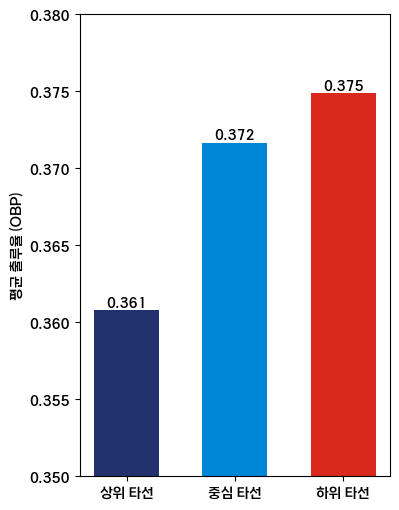

In [13]:

detailed_user_provided_data = {
    2019: {
        '상위 타선': 0.3515691897821658,
        '중심 타선': 0.36475771822598335,
        '하위 타선': 0.3663906911142454

    },
    2020: {
        '상위 타선': 0.3701582222222222,
        '중심 타선': 0.38108800000000004,
        '하위 타선': 0.3833511111111111

    },
    2021: {
        '상위 타선': 0.3622915782024062,
        '중심 타선': 0.37872611464968153,
        '하위 타선': 0.3747162066525124
    },
    2022: {
        '상위 타선': 0.3621247453377214,
        '중심 타선': 0.3586466071148723,
        '하위 타선': 0.37783513555868986

    },
    2023: {
        '상위 타선': 0.35768030089327696,
        '중심 타선': 0.3750910515593167,
        '하위 타선':  0.37216846889202315

    }
}

df_detailed_user_scores = pd.DataFrame(detailed_user_provided_data).T
# 상위 타선, 중심 타선, 하위 타선 각각의 평균 계산
average_scores = df_detailed_user_scores.mean()

# 바 차트 그리기
plt.figure(figsize=(4, 6))

categories = average_scores.index
values = average_scores.values

# 막대 그래프 그리기
bars = plt.bar(categories, values, color=['#22326e', '#0086D6', '#DA291C'], width=0.6)
# 값 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

# 그래프 배경을 투명하게 설정
plt.gca().patch.set_alpha(0)
plt.grid(False)

plt.ylabel('평균 출루율 (OBP)')
plt.ylim(0.35, 0.38)  # y축 최소값 조정
# 그래프를 투명 배경으로 저장
plt.savefig('타선별 출루율_타선변경.png', transparent=True)
plt.show()

In [ ]:
average_scores

상위 타순    0.360765
중심 타순    0.371662
하위 타순    0.374892
dtype: float64